In [21]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima


In [48]:
data = pd.read_csv('ail_frx.csv')
data['date'] = data['date'].str.replace('"', '').astype(float)
data['open'] = data['open'].str.replace('"', '').astype(float)
data['high'] = data['high'].str.replace('"', '').astype(float)
data['low'] = data['low'].str.replace('"', '').astype(float)
data['close'] = data['close'].str.replace('"', '').astype(float)



In [49]:
# Step 2: Convert DataFrame to TensorFlow tensors
dates = tf.constant(data['date'], dtype=tf.float64)
open_prices = tf.constant(data['open'], dtype=tf.float64)
high_prices = tf.constant(data['high'], dtype=tf.float64)
low_prices = tf.constant(data['low'], dtype=tf.float64)
close_prices = tf.constant(data['close'], dtype=tf.float64)

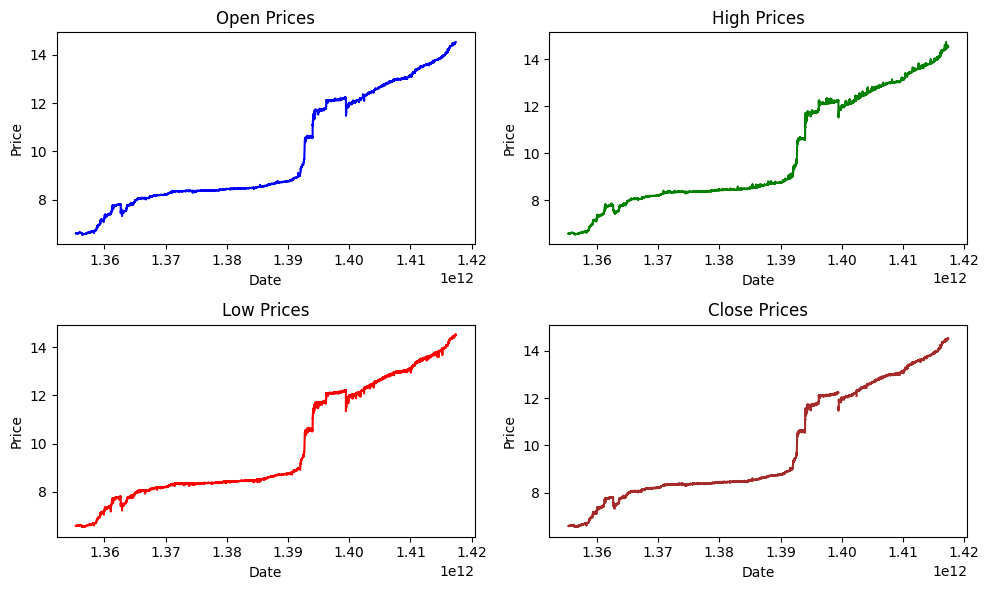

In [50]:
plt.figure(figsize=(10, 6))

# Open Prices
plt.subplot(2, 2, 1)
plt.plot(dates, open_prices, color='blue')
plt.title('Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# High Prices
plt.subplot(2, 2, 2)
plt.plot(dates, high_prices, color='green')
plt.title('High Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Low Prices
plt.subplot(2, 2, 3)
plt.plot(dates, low_prices, color='red')
plt.title('Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Close Prices
plt.subplot(2, 2, 4)
plt.plot(dates, close_prices, color='brown')
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [55]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 date     0
open     0
high     0
low      0
close    2
dtype: int64


In [54]:
data.interpolate(method='linear', inplace=True)

In [58]:
dataset_ex_df = data.copy()
dataset_ex_df = dataset_ex_df.reset_index()
dataset_ex_df['date'] = pd.to_datetime(dataset_ex_df['date'])
dataset_ex_df.set_index('date', inplace=True)
dataset_ex_df = dataset_ex_df['open'].to_frame()




In [61]:


# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(dataset_ex_df['open'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-64450.241, Time=9.01 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-55600.074, Time=0.67 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-59468.162, Time=0.48 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-63295.520, Time=1.73 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-55602.074, Time=0.47 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-64281.048, Time=6.77 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-63683.266, Time=6.14 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-64331.526, Time=8.99 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-64022.069, Time=3.32 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.62 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-63967.713, Time=2.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-64179.916, Time=6.86 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-63926.007, Time=1.92 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=3.31 sec

Best model:  ARIMA

In [63]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,2,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = dataset_ex_df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

c:\Users\Lenovo\anaconda3\envs\tensorflowgpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\envs\tensorflowgpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\envs\tensorflowgpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\envs\tensorflowgpu\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anac

KeyboardInterrupt: 

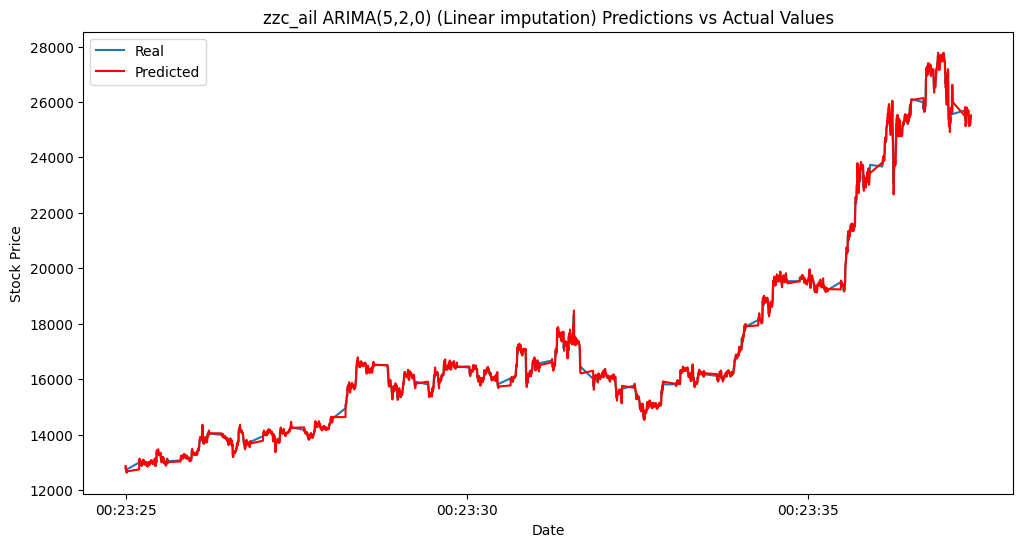

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Real')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ail_frx (open) ARIMA(2,2,2) (Linear imputation) Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
"""from sklearn.metrics import mean_squared_log_error

# Calculate MSLE for validation data
msle_val = mean_squared_log_error(val_data, forecast_val)
print("MSLE for validation data:", msle_val)

# Calculate MSLE for test data
msle_test = mean_squared_log_error(test_data, forecast_test)
print("MSLE for test data:", msle_test)"""

'from sklearn.metrics import mean_squared_log_error\n\n# Calculate MSLE for validation data\nmsle_val = mean_squared_log_error(val_data, forecast_val)\nprint("MSLE for validation data:", msle_val)\n\n# Calculate MSLE for test data\nmsle_test = mean_squared_log_error(test_data, forecast_test)\nprint("MSLE for test data:", msle_test)'

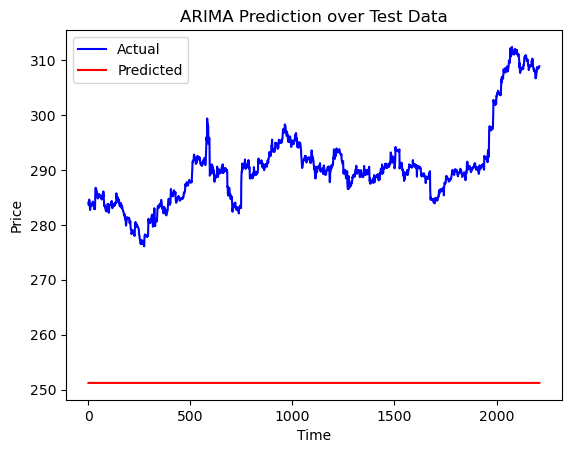

In [126]:
"""import matplotlib.pyplot as plt

# Generate time indices for the test data
time_indices = range(len(test_data))

# Plot actual test data
plt.plot(time_indices, test_data, label='Actual', color='blue')

# Plot predicted values over the same time indices
plt.plot(time_indices, forecast_test, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ARIMA Prediction over Test Data')
plt.legend()

# Show plot
plt.show()"""